#Customer spend analysis -  Supermarkets 

##Identify top supermarkets and customer spend patterns

In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import pyodbc

#Fetch data from Database

In [0]:
query = "<sqltogetdatafromdb"
df = pd.read_sql(query, cnxn)
df.shape

Out[9]: (1483061, 13)

In [0]:
df.CountT.sum()

Out[10]: 3730984

In [0]:
df.sample(8)

Out[11]:

,YearMonth,MERCHANT_ID,CountT,Amount,MaxAmt,MinAmt,AvgAmt,DEBIT_ACCT_NO,DR_CUSTOMER_ID,CREDIT_ACCT_NO,CARD_ACC_ID,CARD_ACC_NAME_LOC,MerchantCategory
1426002,202102,5499,1,2579.92,2579.92,2579.92,2579.92,0069909710,14440281,NGN1030000042001,2058Z793,RETAIL SUPERMARKETS NIGLA LANG,None
975076,202002,6011,1,9000.00,9000.00,9000.00,9000.00,0022583739,688232,NGN1000401132130,1232301D,VIC PHRANC SUPERMART ABUJA NCNG,SME_POS
585709,202008,6011,2,20000.00,10000.00,10000.00,10000.00,0070311346,14477313,NGN1020400022001,1050C029,ENG LA SHOPRITE IKEJA LAGOS LANG,SME_POS
1048860,202001,5411,1,105000.00,105000.00,105000.00,105000.00,0058672009,None,None,201154KM,SETZ MEGA MART LANG NG,Supermarket
500058,202012,5411,1,1000.00,1000.00,1000.00,1000.00,0074848727,14872946,NGN1030000012001,20584A78,JENDOL SUPERSTORES LA LANG,Supermarket
1252515,202008,5300,2,600.00,300.00,300.00,300.00,0012236409,6644924,NGN1030000042001,2070BT74,TEMPLE HILL SUPERMART LLA LANG,MobileWalletLoanBettingApp
615753,202105,5811,1,5090.00,5090.00,5090.00,5090.00,0066332445,13833537,NGN1030000042001,2058ZH38,LEEDEL SUPER STORES LIMIM LANG,Restaurant
538083,202005,5999,1,2410.00,2410.00,2410.00,2410.00,0016258175,354684,NGN1030000012001,2057H018,GRAVITAS SUPERMARKET LA LANG,Supermarket


In [0]:
s = df.DEBIT_ACCT_NO.unique()
s = s[:]
len(s)

Out[12]: 237061

In [0]:
myjoin1 = ','.join(s) 
listofcust  = myjoin1.replace(",", "','")
listofcust = "'" + listofcust + "'"
listofcust

Out[14]: "'0073445466'"

In [0]:
s = df.DEBIT_ACCT_NO.unique()
s = s[:]
# len(s)
s.shape

Out[17]: (237061,)

In [0]:
batch = [s[i:i + 15000] for i in range(0, len(s), 15000)]

for b in batch:
    myjoin1 = ','.join(b)
    listofcust  = myjoin1.replace(",", "','")
    listofcust = "'" + listofcust + "'"
    #Fetch customer transaction using sql query
    query= f"........<sql query>"

    customerfetch = pd.read_sql(query, cnxn)
    print('fetched new batch')
    newcustomer= pd.DataFrame(customerfetch)
    customers = customers.append(newcustomer, ignore_index=True) 
print('done')
customers.shape


fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
fetched new batch
done
Out[18]: (235810, 17)

In [0]:
df.rename(columns={'DEBIT_ACCT_NO':'AccountNumber'}, inplace=True)

In [0]:
merged_fuel = pd.merge(df, customers, on=['AccountNumber'], how='left') 

In [0]:
new_df = merged_fuel

#Feature engineering

In [0]:
new_df['Year_Tranx'] = new_df['YearMonth'].str[:4]
new_df['Month_Tranx'] = new_df['YearMonth'].str[4:]
new_df['Merchant_loc'] = new_df['CARD_ACC_NAME_LOC'].str.split().str[-1]


In [0]:
new_df['Merchant_loc'] = new_df['CARD_ACC_NAME_LOC'].str.split().str[-1]

In [0]:
new_df['Fullmonth_Tranx'] = new_df['Month_Tranx'].map({'01': 'JAN',  '02': 'FEB', '03': 'MAR', '04': 'APR', '05': 'MAY', '06': 'JUN', '07': 'JUL', '08': 'AUG', '09': 'SEP', '10': 'OCT', '11': 'NOV', '12': 'DEC'})

In [0]:
new_df['Fullmerchant_loc'] = new_df['Merchant_loc'].map({
   'BONG':'BORNO','ONNG':'ONDO', 'RING':'RIVERS', 'NG':'NIGERIA', 'FCNG': 'FCT' ,'ABNG':'ABIA', 'ADNG':'ADAMAWA', 'AKNG':'AKWA IBOM', 'ANNG':'ANAMBRA', 'BANG' : 'BAUCHI', 'BYNG' : 'BAYELSA', 'BENG':'BENUE',
    'CRNG':'CROSS RIVER', 'DENG':'DELTA', 'EBNG':'EBONYI', 'EDNG': 'EDO', 'EKNG':'EKITI', 'ENNG':'ENUGU', 'GONG':'GOMBE','IMNG':'IMO',
    'JING':'JIGAWA', 'KDNG':'KADUNA', 'KNNG':'KANO', 'KTNG' :'KATSINA', 'KENG':'KEBBI', 'KONG':'KOGI', 'KWNG':'KWARA','LANG':'LAGOS', 'NANG':'NASARAWA',
    'NING' : 'NIGER', 'OGNG':'OGUN', 'OSNG':'OSUN', 'OYNG':'OYO', 'PLNG':'PLATEAU', 'SONG': 'SOKOTO', 'TANG':'TARABA', 'YONG':'YOBE',
    'ZANG':'ZAMFARA', 'FILANG':'No_State', 'SERVICESLANG': 'LAGOS', '0000000000000000':'NIGERIA', 'ALNG':'NIGERIA', 'DLNG':'DELTA', 'EPE':'LAGOS', 'JAKANDE':'LAGOS', 'L12NG':'LAGOS', 'LLANG':'LAGOS', 'PETRLANG':'LAGOS', 'SHAMALANG':'LAGOS', 'VI':'LAGOS', 'OGUN':'OGUN',
     'GB' : 'United Kingdom', 'US' : 'USA', 'RU' : 'Russia', 'AE' : 'United Arab Emirates', 'NL' :'Netherlands',
    'CA' :'USA',  'IN':'India', 'NL' :'Netherlands', 'IT':'Italy', 'EG' :'Egypt', 'TR': 'Turkey', 'NL' :'Netherlands', 
    'GH' : 'Ghana',  'ES' : 'Spain', 'CH' : 'Switzerland', 'MY' : 'Malaysia', 'IE' : 'Ireland', 'AU' : 'Australia', 
    'HU' : 'Hungary', 'ZM' : 'Zambia',  'CZ' : 'Czech Republic',  'UG' : 'Uganda', 'ILUS' : 'Chicago',  'FR' : 'France',
    'MT' : 'Malta',  'SE' : 'Sweden', 'DE' : 'Germany', 'KE' : 'Kenya', 'SA' : 'Saudi Arabia', 'NZ' : 'New Zealand',
    'HK' : 'Hong Kong', 'PK' : 'Pakistan', 'MK' : 'Republic of North Macedonia', 'BR' : 'Brazil', 'QA' : 'Qatar', 'PS' : 'Palestinian National Authority',
    'UA' : 'Ukraine', 'CN' : 'China', 'QA' : 'Qatar', 'SG' : 'Singapore', 'CI' : 'Ivory Coast', 'TN' : 'Tunisia', 'ID' : 'Indonesia',
    'PT' : 'Portugal', 'MU' : 'Mauritius', 'ET' : 'Ethiopia', 'TZ' : 'Tanzania','LK' : 'Sri Lanka',
    'FI' : 'Finland',  'LT' : 'Lithuania', 'TH' : 'Thailand', 'LB' : 'Lebanon', 'BB' : 'Barbados', 'JO' : 'Jordan', 'RW' : 'Rwanda',
    'BJ' : 'Benin',   'NP' : 'Nepal', 'OM' : 'Oman', 'LC' : 'Saint Lucia', 'CV' : 'Cape Verde', 'BS' : 'Bahamas', 'BW' : 'Botswana', 
    'GT' : 'Guatemala', 'SI' : 'Slovenia', 'AZ' : 'Azerbaijan', 'RO' : 'Romania', 'TD' : 'Chad', 'GR' : 'Greece', 'BF' : 'Burkina Faso',
    'KR' : 'South Korea', 'ZW' : 'Zimbabwe', 'GE' : 'Georgia', 'CY' : 'Cyprus', 'DM' : 'Dominica', 
    'SC' : 'SCUS', 'KH' : 'Cambodia', 'VC' : 'Saint Vincent and the Grenadines', 'BE':'Belgium', 'INUS':'INDIANAPOLIS', 'PL':'PL', 'ZA': 'South Africa', 'TNUS': 'USA', 'ALUS':'USA', 'BCCA':'Canada', 'FALLSONCA':'Canada', 'FLUS':'USA', 'GAUS':'USA', 'HILLONCA':'Canada', 'MBCA':'Canada', 'MAUS': 'USA', 'MDUS':'USA', 'SPRINGMDUS':'USA', 'SKCA':'Canada', 'TXUS':'USA', 'ONCA':'Canada', 'VALLEYCAUS':'USA', 'SCUS':'USA', 'NYUS': 'USA', 'NJUS':'USA', 'HOLLYWOCAUS':'USA'
})

In [0]:
new_df['Fullmerchant_region'] = new_df['Fullmerchant_loc'].map(lambda x: 'North Central' if x in ['BENUE','KOGI','KWARA','NASARAWA', 'NIGER','PLATEAU','FCT'] else
                                                               ('North East' if x in ['ADAMAWA','BAUCHI','BORNO','GOMBE', 'TARABA','YOBE'] else
                                                               'North West' if x in ['JIGAWA','KADUNA','KANO','KATSINA', 'KEBBI','SOKOTO','ZAMFARA'] else
                                                               'South East' if x in ['ABIA','ANAMBRA','EBONYI','ENUGU', 'IMO'] else
                                                               'South South' if x in ['AKWA IBOM','BAYELSA','CROSS RIVER','RIVERS', 'DELTA','EDO'] else
                                                               'South West' if x in ['EKITI','LAGOS','OGUN','ONDO', 'OSUN','OYO'] else
                                                               'No_State' if x in ['NIGERIA'] else 'Diaspora'
                                                               ))

In [0]:
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

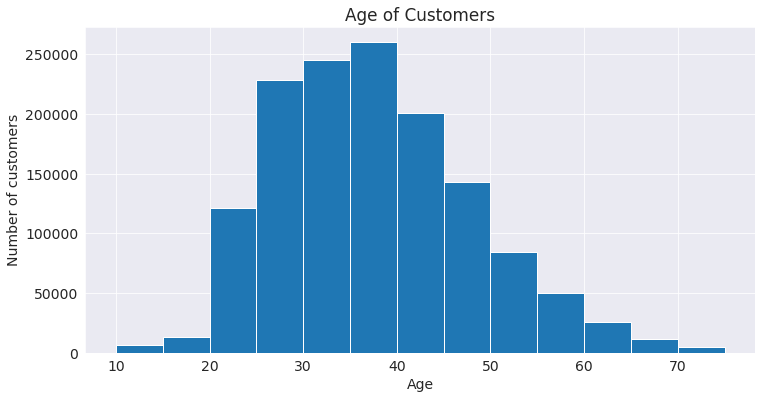

In [0]:
plt.figure(figsize=(12, 6))
plt.title('Age of Customers')
plt.xlabel('Age')
plt.ylabel('Number of customers')

plt.hist(new_df.age, bins=np.arange(10,80,5));

In [0]:
new_df['newmerchaname'] = new_df['CARD_ACC_NAME_LOC'].str[:-4]

In [0]:
new_df.head(2)

Out[33]:

,YearMonth,MERCHANT_ID,CountT,Amount,MaxAmt,MinAmt,AvgAmt,AccountNumber,DR_CUSTOMER_ID,CREDIT_ACCT_NO,CARD_ACC_ID,CARD_ACC_NAME_LOC,MerchantCategory,AccountTITLE1,gender,age,Customerid,Short_name,CurrentBalance,State,AccountStatus,DateOpened,ProductName,Product_Group,Product_Desc,Industry,sector,Industry_desc,Sector_desc,Year_Tranx,Month_Tranx,Merchant_loc,Fullmonth_Tranx,Fullmerchant_loc,Fullmerchant_region,newmerchaname
0,202105,5411,2,4725.0,3470.0,1255.0,2362.5,0073445466,14762633,NGN1030000052001,2032YRPA,HARTLEYS SUPERMARKET LA NG,Supermarket,IBHAROGA PIUS AREBANMEN,MALE,38.0,14762633,IBHAROGA PIUS AREBANMEN,1550.4,Edo State,Active,2019-07-17,CLASSIC.ACCT,CURRENT.ACCOUNTS-STR,Individual-AMF,4804.0,4800,Ind . Private Sector Employee,GENERAL,2021,05,NG,MAY,NIGERIA,No_State,HARTLEYS SUPERMARKET LA
1,202105,5411,2,4725.0,3470.0,1255.0,2362.5,0073445466,14762633,NGN1030000052001,2032YRPA,HARTLEYS SUPERMARKET LA NG,Supermarket,IBHAROGA PIUS AREBANMEN,MALE,38.0,14762633,IBHAROGA PIUS AREBANMEN,1550.4,Edo State,Active,2019-07-17,CLASSIC.ACCT,CURRENT.ACCOUNTS-STR,Individual-AMF,4804.0,4800,Ind . Private Sector Employee,GENERAL,2021,05,NG,MAY,NIGERIA,No_State,HARTLEYS SUPERMARKET LA


In [0]:
dup = new_df[new_df.duplicated()]

In [0]:
top_merchants = new_df.newmerchaname.value_counts().head(20)
top_merchants

Out[36]: Justrite Superstore OG 47097
STERLING IKOTA SHOPPINGCOMPLEX 30182
ARTEE INDUSTRIES LTD LANG 29168
41/43 MARTINS STREET LAGOS 27829
BLENCO BUSINESS VENT LA 21987
ARTEE INDUSTRIES LIM LANG 20238
JENDOL SUPERSTORES LA 15616
EKEOHA SHOPPING CTNR ABA 14637
PENNYMART GLOBAL CON LA 12937
RETAIL SUPERMARKETS LA 12303
ARTEE INDUSTRIES LTD LA 11103
SUPER SAVER SUPERMAR LA 10756
RETAIL SUPERMARKETS NIGLA 9392
fw.shop* Lekki Phase 1 9127
ARTEE INDUSTRIES LIMIT LANG 9109
GLOBUS SUPERMARKET L LA 8064
HUBMART STORES LIMIT LA 7984
JUSTRITE LIMITED LA 7639
SHOP PERFECT LIMITED LA 7581
Ritehealth Supermarket1 STERLING 7551
Name: newmerchaname, dtype: int64

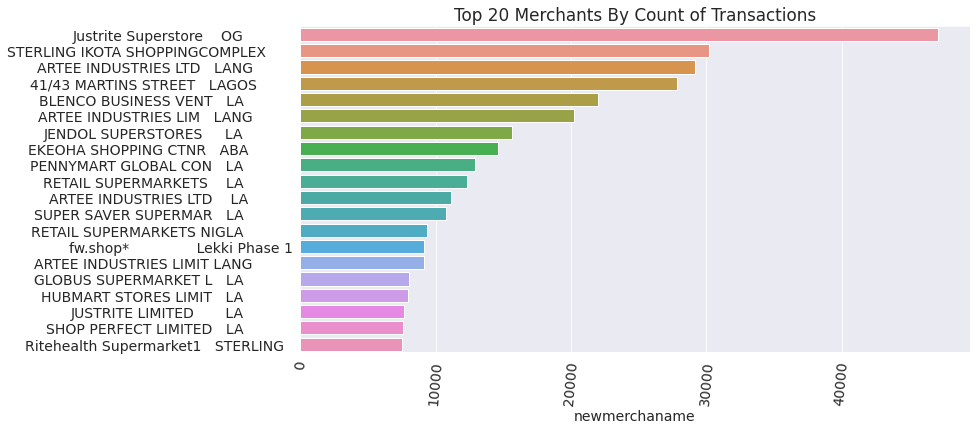

In [0]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=85)
plt.title('Top 20 Merchants By Count of Transactions')
sns.barplot(x=top_merchants, y=top_merchants.index);

In [0]:
new_df.newmerchaname.nunique()

Out[39]: 23091

In [0]:
dfwithstate = new_df.loc[(new_df['Fullmerchant_region'] != "No_State") & (new_df['Fullmerchant_region'] != "Diaspora") ]

In [0]:

Region_counts = dfwithstate.Fullmerchant_region.value_counts()
Region_counts

Out[42]: South West 787346
South South 82745
North Central 56938
South East 22587
North West 10779
North East 2004
Name: Fullmerchant_region, dtype: int64

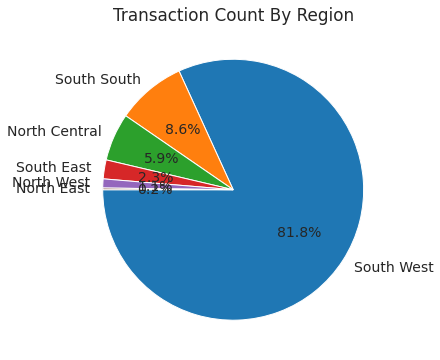

In [0]:
plt.figure(figsize=(12,6))
plt.title('Transaction Count By Region')
plt.pie(Region_counts, labels=Region_counts.index, autopct='%1.1f%%', startangle=180);

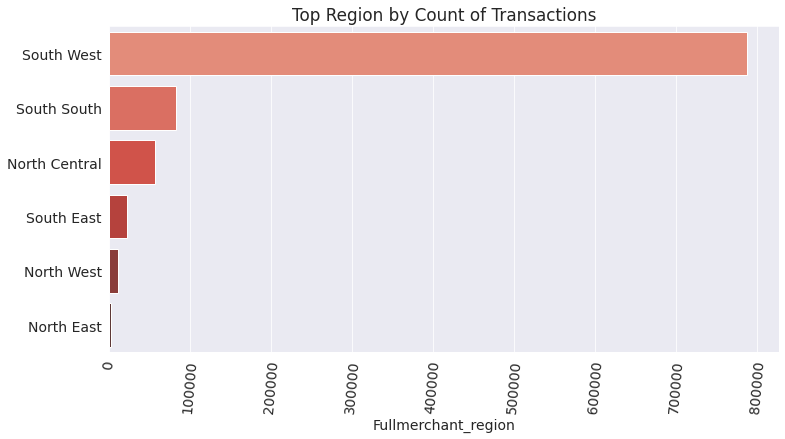

In [0]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=85)
plt.title('Top Region by Count of Transactions')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x=Region_counts, y=Region_counts.index, palette="Reds_d");




In [0]:
n = 30
new_df.groupby(['gender'])['AccountNumber'].count().nlargest(n)

Out[45]: gender
MALE 895122
FEMALE 505038
Name: AccountNumber, dtype: int64

In [0]:
n = 30
new_df.groupby(['Fullmerchant_loc'])['CountT'].sum().nlargest(n)

Out[46]: Fullmerchant_loc
NIGERIA 1172525
LAGOS 931127
FCT 57887
RIVERS 47550
OGUN 40020
DELTA 25534
OYO 24439
EDO 11590
AKWA IBOM 11039
ENUGU 9745
KWARA 9609
KANO 9597
IMO 8028
ONDO 7148
ANAMBRA 5627
BAYELSA 5110
KADUNA 4342
ABIA 3654
CROSS RIVER 3604
EKITI 2446
PLATEAU 1768
OSUN 1165
GOMBE 1050
NASARAWA 1013
EBONYI 968
NIGER 826
BORNO 718
TARABA 492
BENUE 452
KOGI 423
Name: CountT, dtype: int64

In [0]:
year2020 =  new_df[new_df['Year_Tranx'] == '2020']


In [0]:
year2021 =  new_df[new_df['Year_Tranx'] == '2021']

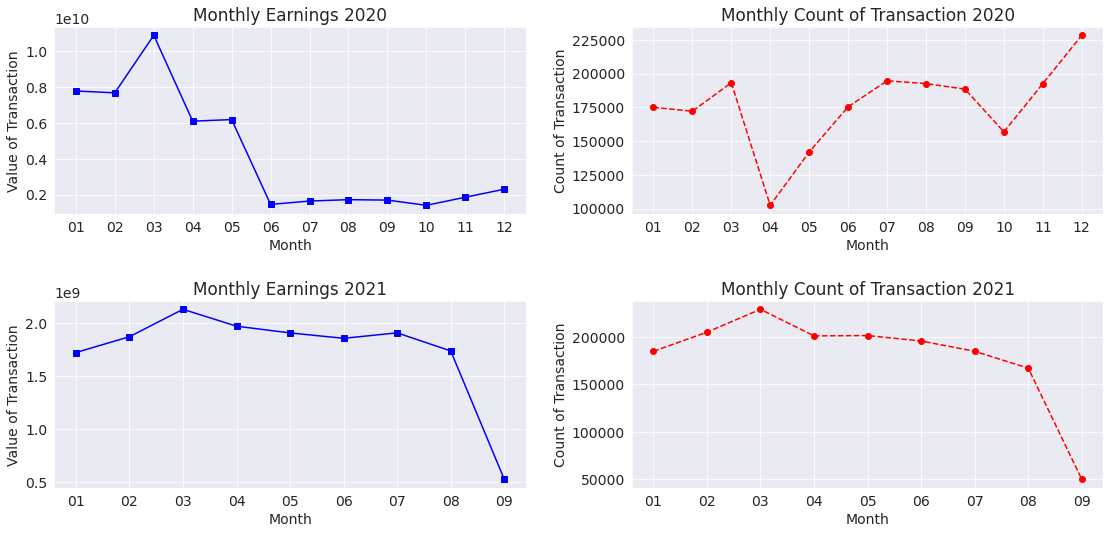

In [0]:
data2 = year2020[['Month_Tranx', 'CountT']].groupby(by='Month_Tranx').sum()
data3 = year2020[['Month_Tranx', 'Amount']].groupby(by='Month_Tranx').sum()
data = year2021[['Month_Tranx', 'CountT']].groupby(by='Month_Tranx').sum()
data1 = year2021[['Month_Tranx', 'Amount']].groupby(by='Month_Tranx').sum()

fig, axes = plt.subplots(2,2, figsize=(16, 8))

axes[0,0].plot(data3.Amount, 's-b')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Value of Transaction')
axes[0,0].set_title('Monthly Earnings 2020')


axes[0,1].plot(data2.CountT,  'o--r')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Count of Transaction')
axes[0,1].set_title('Monthly Count of Transaction 2020')

axes[1,0].plot(data1.Amount, 's-b')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Value of Transaction')
axes[1,0].set_title('Monthly Earnings 2021')

axes[1,1].plot(data.CountT,  'o--r')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Count of Transaction')
axes[1,1].set_title('Monthly Count of Transaction 2021')

plt.tight_layout(pad=2)

In [0]:
n = 30
year2020.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[53]: CARD_ACC_NAME_LOC
BISHOP BITES, ONITSHA Onitsha SENG 273771
VIC PHRANC SUPERMART ABUJA NCNG 181113
Ritehealth Supermarket1 STERLING NG 148596
41/43 MARTINS STREET LAGOS SWNG 122420
GRAVISTA SUPERMARKET LEKKI LAGOS SWNG 87093
EKEOHA SHOPPING CTNR ABA SENG 87003
General Supermarket2 STERLING NG 83155
General Supermarket1 STERLING NG 71586
STERLING IKOTA SHOPPINGCOMPLEX SWNG 71445
Ritehealth Supermarket2 STERLING NG 64912
Justrite Superstore OG LANG 21429
ARTEE INDUSTRIES LTD LANG NG 18601
ARTEE INDUSTRIES LIM LANG NG 15414
SAFEWAY SUPERMATKET KADUNA NCNG 15114
MFB LTB, POWA SHOPPING JIMETA, YOLA NENG 12283
BLENCO BUSINESS VENT LA LANG 12053
PENNYMART GLOBAL CON LA LANG 7681
JENDOL SUPERSTORES LA LANG 6907
SUPER SAVER SUPERMAR LA LANG 5690
ARTEE INDUSTRIES LTD LA LANG 5555
ARTEE INDUSTRIES LIM LA LANG 5377
SHOP PERFECT LIMITED LA LANG 4948
RETAIL SUPERMARKETS LA LANG 4924
JUSTRITE LIMITED LA LANG 4800
HUBMART STORES LIMIT LA LANG 4576
RETAIL SUPERMARKETS NIGLA LANG 4479
Grocery Bazaar Ltd LA LANG 4333
HUBMART STORES LIMIT LANG NG 4103
MMH SUPERSHOPPY OG OGNG 4005
Palms Shopping Mall V.I NG 3858
Name: CountT, dtype: int64

In [0]:
n = 30
year2020.groupby(['CARD_ACC_NAME_LOC'])['Amount'].sum().nlargest(n)

Out[54]: CARD_ACC_NAME_LOC
ARTEE INDUSTRIES LIM LANG NG 3.792486e+09
41/43 MARTINS STREET LAGOS SWNG 2.585691e+09
ARTEE INDUSTRIES LTD LANG NG 2.445114e+09
BISHOP BITES, ONITSHA Onitsha SENG 2.019585e+09
STERLING IKOTA SHOPPINGCOMPLEX SWNG 1.684662e+09
VIC PHRANC SUPERMART ABUJA NCNG 1.453051e+09
Ritehealth Supermarket1 STERLING NG 1.428724e+09
EKEOHA SHOPPING CTNR ABA SENG 1.350262e+09
GAME DISCOUNT WORLD LANG NG 1.172634e+09
ARTEE INDUSTRIES LIM RING NG 8.946727e+08
General Supermarket2 STERLING NG 7.028934e+08
GRAVISTA SUPERMARKET LEKKI LAGOS SWNG 6.737180e+08
General Supermarket1 STERLING NG 6.659988e+08
GAME DISCOUNT WORLD (N LANG NG 6.046616e+08
Ritehealth Supermarket2 STERLING NG 6.002191e+08
SHOP PERFECT LIMITED A L NG 5.528952e+08
ARTEE INDUSTRIES LTD A LANG NG 5.180508e+08
4 U SUPERMARKET LIMI FCNG NG 4.992824e+08
KARMA MART LTD LANG NG 4.767222e+08
DELIS SUPERMARKET AND LANG NG 4.508606e+08
ARTEE INDUSTRIES LTD I LANG NG 4.447477e+08
ARTEE INDUSTRIES LIM FCNG NG 4.144006e+08
NY SUPERMARKET LIMIT LANG NG 4.099333e+08
PARK AND SHOP ADEOLA O LANG NG 4.067255e+08
ARTEE INDUSTRIES LTD L LANG NG 3.784807e+08
HUBMART STORES LIMIT LANG NG 3.002779e+08
PHIL HALLMARK SUPERM D E NG 3.001894e+08
ARTEE INDUSTRIES LTD RING NG 2.938075e+08
HUBMART STORES LIMITED LANG NG 2.893773e+08
GAME DISCOUNT WORLD (N ABUJA MUNICIP NG 2.802428e+08
Name: Amount, dtype: float64

In [0]:
January.Amount.sum(), Dec.Amount.sum()

Out[61]: (7768949631.86, 2298627507.41)

In [0]:
January.CountT.sum(), Dec.CountT.sum()

Out[62]: (175017, 228370)

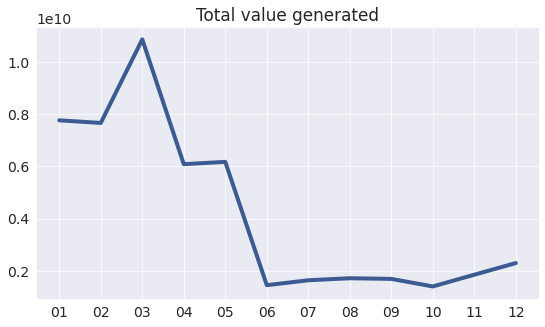

In [0]:
data = year2020[['Month_Tranx', 'Amount']].groupby(by='Month_Tranx').sum()

plt.plot(data.Amount, sns.xkcd_rgb["denim blue"], lw=4)
plt.title("Total value generated");

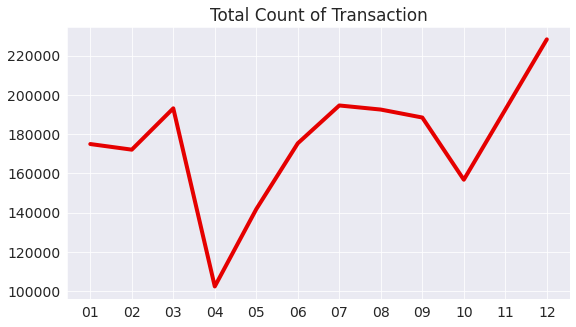

In [0]:
data = year2020[['Month_Tranx', 'CountT']].groupby(by='Month_Tranx').sum()


plt.plot(data.CountT, sns.xkcd_rgb["red"], lw=4)
plt.title("Total Count of Transaction");

In [0]:
January21 = year2021[year2021['Month_Tranx'] == '01']
sept21 = year2021[year2021['Month_Tranx'] == '08']

In [0]:
January21.shape, sept21.shape

Out[66]: ((82318, 36), (80006, 36))

In [0]:
January21.CountT.sum(), sept21.CountT.sum()

Out[67]: (184645, 166934)

In [0]:
January21.Amount.sum(), sept21.Amount.sum()

Out[68]: (1723847714.3400002, 1738919851.77)

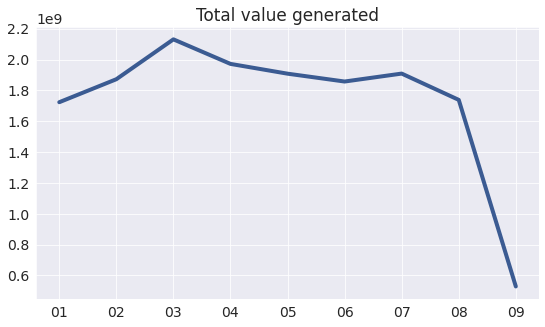

In [0]:
data = year2021[['Month_Tranx', 'Amount']].groupby(by='Month_Tranx').sum()


plt.plot(data.Amount, sns.xkcd_rgb["denim blue"], lw=4)
plt.title("Total value generated");

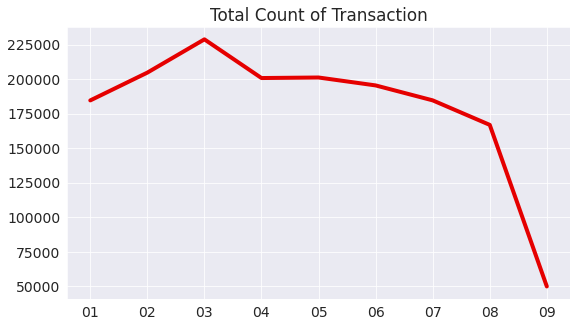

In [0]:
data = year2021[['Month_Tranx', 'CountT']].groupby(by='Month_Tranx').sum()


plt.plot(data.CountT, sns.xkcd_rgb["red"], lw=4)
plt.title("Total Count of Transaction");

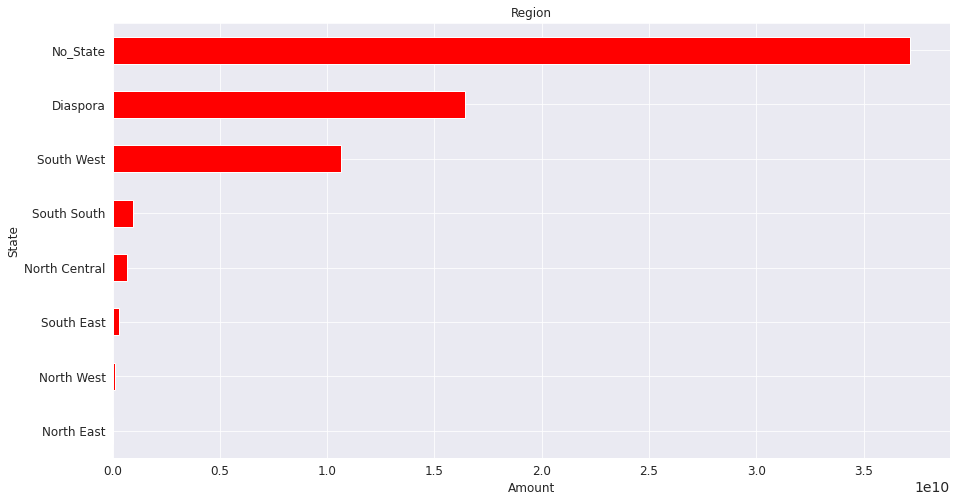

In [0]:
color = sns.color_palette()
group_state = new_df.groupby('Fullmerchant_region')['Amount'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_state.plot(kind='barh', fontsize=12, color='red')
plt.xlabel('Amount', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Region', fontsize=12)
plt.show()

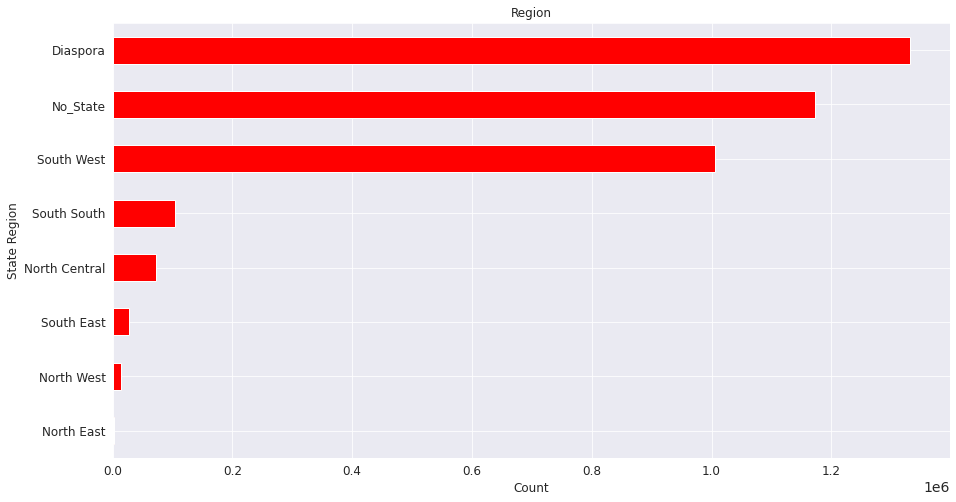

In [0]:
color = sns.color_palette()
group_state = new_df.groupby('Fullmerchant_region')['CountT'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_state.plot(kind='barh', fontsize=12, color='red')
plt.xlabel('Count', fontsize=12)
plt.ylabel('State Region', fontsize=12)
plt.title('Region', fontsize=12)
plt.show()

In [0]:
# color = sns.color_palette()
# group_state = new_df.groupby('Fullmerchant_loc')['CountT'].sum().sort_values()
# # del group_country_orders['United Kingdom']

# # plot total money spent by each country (with UK)
# plt.subplots(figsize=(15,8))
# group_state.plot(kind='barh', fontsize=12, color='red')
# plt.xlabel('Count', fontsize=12)
# plt.ylabel('State', fontsize=12)
# plt.title('State', fontsize=12)
# plt.show()

In [0]:
SW = new_df[new_df['Fullmerchant_region'] == 'South West']
n = 30
SW.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[74]: CARD_ACC_NAME_LOC
Justrite Superstore OG LANG 46584
BLENCO BUSINESS VENT LA LANG 24373
JENDOL SUPERSTORES LA LANG 17387
PENNYMART GLOBAL CON LA LANG 15288
RETAIL SUPERMARKETS LA LANG 13478
SUPER SAVER SUPERMAR LA LANG 12592
ARTEE INDUSTRIES LTD LA LANG 12269
RETAIL SUPERMARKETS NIGLA LANG 10448
GLOBUS SUPERMARKET L LA LANG 9656
SHOP PERFECT LIMITED LA LANG 9297
MMH SUPERSHOPPY OG OGNG 9143
HUBMART STORES LIMIT LA LANG 8875
SHOPPEE MALL ONIRU MARKET LEKKI LANG 8788
Grocery Bazaar Ltd LA LANG 8169
JUSTRITE LIMITED LA LANG 7755
TWINSFAJA SUPERMARKE LA LANG 7620
ARTEE INDUSTRIES LIM LA LANG 7403
JUSTRITE TRADING INT LA LANG 6861
TEMPLE HILL SUPERMAR LA LANG 6787
JENDOL NIGERIA LIMIT LA LANG 6517
JUSTRITE ABULE EGBA OG LANG 6140
JENDOL NIGERIA LIMITED LA LANG 5892
TARGET SUPERMARKET LA LANG 5259
ADIBA ONLINE SHOPPIN LA LANG 5036
PRINCE EBEANO SUPERMARKLAGOS LANG 5030
JENDOL SUPERSTORES ( LA LANG 5004
Justrite Superstore OG OGNG 4952
AWOYAYA SHOPPING COMP_7LAGOS LANG 4907
Justrite Superstore LA LANG 4835
Twins Faja Lasu ATM 2 LAGOS LANG 4769
Name: CountT, dtype: int64

In [0]:
SS = new_df[new_df['Fullmerchant_region'] == 'South South']
n = 30
SS.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[75]: CARD_ACC_NAME_LOC
RETAIL SUPERMARKETS DE DENG 6599
LIVICHUN SUPERMARKET RI RING 4150
DEE GABBS SHOPPING M DE DENG 3986
ARTEE INDUSTRIES LIM RI RING 2997
EVERYDAY SUPERMARKET RI RING 2456
TIMELESS SUPERSTORES RI RING 2385
Phil Hallmark Superm ED EDNG 2266
WIDE CHOICE SUPERMAR RI RING 2243
PHIL HALLMARK SUPERM ED EDNG 1684
DE WELLDONE SUPERMAR RI RING 1651
STOP AND SHOP HEALTH AK AKNG 1530
STOP2SHOP SUPERMARKE ED EDNG 1477
MY SUGARLAND SUPERMA RI RING 1471
WELCOME U SHOPPING C LA RING 1379
ARTEE INDUSTRIES LIM CR CRNG 1355
TIVO SUPERMARKET PO DE DENG 1310
WELCOME 'U' SHOPPING RI RING 1168
SUNKY SUPERMARKET VE BY BYNG 1096
PHIL HALLMARK SUPERM ED EDNG 1040
M MARTIMO NIGERIA EN ED EDNG 984
ARTEE INDUSTRIES LTD RI RING 955
GEMSTONE ULTRAMART L DE DENG 923
Rojo Supermarkets Ni RI RING 857
LOVETHIGHO MINI MART DE DENG 843
DE TOPIC SUPERMARKET RI RING 812
GRAND SHOP RI RING 764
WINNERS CHILD SUPERM RI RING 758
RICH-WAY SUPERMARKET AK AKNG 755
SLIMSHADY STORES DE DENG 714
LEE OASIS SUPERMARKE DE DENG 702
Name: CountT, dtype: int64

In [0]:
NW = new_df[new_df['Fullmerchant_region'] == 'North West']
n = 30
NW.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[76]: CARD_ACC_NAME_LOC
MEKRIX SUPERMARKET A KD KDNG 2446
RETAIL SUPERMARKETS KN KNNG 1157
SAHAD STORES LTD KN KNNG 835
SUFI MART & STORES L KN KNNG 702
SHOPWELL STORES LTD KN KNNG 651
JAAIZ STORES LIMITED KN KNNG 629
KANTI PLUS SUPERMARK KD KDNG 579
JIFATU STORES KN KNNG 500
BRKT STORES KN KNNG 471
GAME DISCOUNT WORLD KN KNNG 453
GRAND GROCERY SUPPLI KN KNNG 414
JAAIZ STORES LTD KN KNNG 299
SUFI MART AND STORES KN KNNG 283
DIA CITY STORES KD KDNG 272
GLOBAL STORES KN KNNG 269
SAHAIBCO STORES KN KNNG 269
SAHAD STORES LTD-FEM KN KNNG 268
GALAXY GROCERY MALL KN KNNG 261
KB SMART LIMITED KN KNNG 234
DAN ALJANNA STORES 1 KN KNNG 209
SUFI MART AND STORES LA KNNG 192
GRAND GROCERY SUPPLI KN KNNG 186
RETAIL SUPERMARKETS NIG. LTD(ADO BA KNNG 168
DANBU STORES KN KNNG 140
SHOPWELL STORES LIMI KN KNNG 128
MINISO LIFESTYLE NIG KN KNNG 123
KARAYE SUPERMARKET KD KDNG 120
GAME DISCOUNT WORLD KN KNNG 117
BETI- BUYMORE SUPERM KD KDNG 115
RAHMAN STORES GLOBAL KD KDNG 115
Name: CountT, dtype: int64

In [0]:
SE= new_df[new_df['Fullmerchant_region'] == 'South East']
n = 30
SE.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[77]: CARD_ACC_NAME_LOC
RETAIL SUPERMARKETS GO IMNG 1869
DESTINY SUPERMARKET IM IMNG 1232
Roban Stores Limited EB ENNG 1035
CHERRIES HYPERMARKET AB ABNG 1000
ARTEE INDUSTRIES LIM EN ENNG 998
BISHOP BITE ATM_18 OSHA ANNG 893
PEP STORES NIGERIA P LA ABNG 882
BISHOP BITE ATM17 OSHA ANNG 875
RETAIL SUPERMARKETS EN ENNG 796
GAME DISCOUNT WORLD EN ENNG 707
ROBAN STORES LTD EB EBNG 634
ROBAN STORES LIMITED EN ENNG 621
Roban Stores Limited AN ENNG 608
LEEDEL SUPER STORES IM IMNG 548
ROBAN STORES LTD LA ENNG 540
PRICE-LESS STORES & IM IMNG 516
ROBAN STORES LIMITED AN ANNG 475
EASTERN SHOP DEPARTM EN ENNG 410
BISHOP BITE ATM6 OSHA ANNG 405
IN GOD SUPERMARKET IM IMNG 358
RETAIL SUPERMARKETS AN ANNG 344
ARTEE INDUSTRIES LTD EN ENNG 334
MARIS SUPERMARKET LT IM IMNG 334
AMBY SUPERMARKET IM IMNG 316
GAME DISCOUNT WORLD LA ABNG 315
ARTEE INDUSTRIES LTD EN ENNG 284
ARTEE INDUSTRIES LIM EN ENNG 279
BISHOP BITE ATM_9 OSHA ANNG 275
RETAIL SUPERMARKETS NIG. LTD(OWERRI IMNG 275
CONSUMART GLOBAL SER IM IMNG 272
Name: CountT, dtype: int64

In [0]:
NC =new_df[new_df['Fullmerchant_region'] == 'North Central']
n = 30
NC.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[78]: CARD_ACC_NAME_LOC
PRINCE EBEANO SUPERM FC FCNG 3522
JUSTRITE ALAKUKO 88, UNITY RD FCNG 3300
CITY MART PHARM & ST FC FCNG 2607
FAXX STORES & TRADIN FC FCNG 2420
4 U SUPERMARKET LIMI FC FCNG 2380
KWARA SHOPPING MALL ILORIN KWNG 2123
RETAIL SUPERMARKETS FC FCNG 1778
EDINWO SUPERMARKET L KW KWNG 1625
CHERRIES HYPERMARKET FC FCNG 1492
DUTYFREE SUPERMARKET FC FCNG 1487
SAHAD STORES LTD CBD FC FCNG 1386
4U SUPERMARKET LTD FC FCNG 1346
AYM SHAFA SHOPRITE FC FCNG 1221
FAXX STORES AND TRAD FC FCNG 1192
2K SUPER MART LIMITE FC FCNG 1165
CHUPET STORES KW KWNG 1042
CHERRIES HYPERMARKET FC FCNG 986
RETAIL SUPERMARKETS EN FCNG 984
ARTEE INDUSTRIES LIM FC FCNG 932
CITY MART PHARM AND FC FCNG 929
ARTEE INDUSTRIES LTD FC FCNG 880
M&J SUPERMARKET ATM4 JOS PLNG 873
AGAS MINI MART KW KWNG 825
RETAIL SUPERMARKETS KW KWNG 816
MAMTESS STORES KW KWNG 808
NADREM SUPERMARKET A FC FCNG 789
Cherries Hypermarket FC FCNG 788
MARTRITE SUPERSTORES KW KWNG 700
UNNEX SUPERMARKET FC FCNG 700
CITY MART PHARM AND LA FCNG 691
Name: CountT, dtype: int64

In [0]:
Diaspora = new_df[new_df['Fullmerchant_region'] == 'Diaspora']
n = 30
Diaspora.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[79]: CARD_ACC_NAME_LOC
BISHOP BITES, ONITSHA Onitsha SENG 357899
VIC PHRANC SUPERMART ABUJA NCNG 304779
EKEOHA SHOPPING CTNR ABA SENG 187767
41/43 MARTINS STREET LAGOS SWNG 148982
STERLING IKOTA SHOPPINGCOMPLEX SWNG 121605
GRAVISTA SUPERMARKET LEKKI LAGOS SWNG 87093
MFB LTB, POWA SHOPPING JIMETA, YOLA NENG 25551
SAFEWAY SUPERMATKET KADUNA NCNG 15114
AWOYAYA SHOPPING COM_8 LEKKI SWNG 5533
AWOYAYA SHOPPING COM_9 LEKKI SWNG 5519
Eze Wali Shopping Mall Opp Agip PH PHNG 4412
Stanbic@DeliteSupermarkAwoyaya LagosLANG 3818
JAIZ BANK SHOP@SHESHE SUPERMKT KANOKNNG 2618
Stanbic@ Grocery Bazaar Igando LagosLANG 2579
EBEANO SUPERMARKET ABUJAABUJA, NIGERING 2383
Justrite Dopemu ATM 1 Agege, LagosLANG 2286
Omatsola Mall,4,Kaffi SShoprite ATM3LANG 2115
Omatsola Mall,4,Kaffi SShoprite ATM2LANG 2092
OPPOSITE PROBOY SHOPPOYO STATE, NGNG 2081
Justrite Dopemu ATM 2 Agege, LagosLANG 1968
Justrite Dopemu ATM 3 Agege, LagosLANG 1930
FCMB BESTSAVER SUPERMARAJAH, LAGOS SWNG 1727
AWOYAYA SHOPPING COM_5 LEKKI SWNG 1719
Shop 56 Enugu Polomall3Enugu EGNG 1694
EVERYDAY SUPERMARKETPHC RIVERS STATE,NG 1602
Shop 56 Polo Mall Enugu EGNG 1566
SHOP 453 NEW ALABA MK_3LAGOS MAINLANEKNG 1522
Shop 56 Enugu Polo mallEnugu EGNG 1393
Shop 56 Enugu Polomall4Enugu EGNG 1334
NEXTIME SUPERMARKET ABACHRIVERS STATE,NG 1254
Name: CountT, dtype: int64

In [0]:
  by_merchant = (year2020
              .groupby('CARD_ACC_NAME_LOC')
              .filter(lambda x : len(x) > 4000)
              .groupby(['CARD_ACC_NAME_LOC', 'Month_Tranx'])
              .size()
              .unstack()
             )
  by_merchant

Out[80]:

Month_Tranx,01,02,03,04,05,06,07,08,09,10,11,12
CARD_ACC_NAME_LOC,,,,,,,,,,,,
41/43 MARTINS STREET LAGOS SWNG,2127.0,2212.0,2189.0,404.0,1409.0,1662.0,1896.0,2143.0,2206.0,1758.0,2150.0,2453.0
ARTEE INDUSTRIES LIM LA LANG,567.0,654.0,672.0,258.0,384.0,145.0,114.0,152.0,385.0,325.0,594.0,666.0
ARTEE INDUSTRIES LIM LANG NG,1378.0,1547.0,1633.0,723.0,1024.0,529.0,596.0,752.0,1241.0,1094.0,1668.0,1896.0
ARTEE INDUSTRIES LTD LA LANG,NaN,NaN,NaN,97.0,307.0,762.0,827.0,817.0,597.0,529.0,491.0,639.0
ARTEE INDUSTRIES LTD LANG NG,478.0,519.0,551.0,551.0,1040.0,2056.0,2232.0,2353.0,2043.0,1552.0,1537.0,1925.0
BLENCO BUSINESS VENT LA LANG,767.0,740.0,820.0,540.0,702.0,861.0,812.0,732.0,988.0,1058.0,1289.0,1383.0
EKEOHA SHOPPING CTNR ABA SENG,208.0,411.0,516.0,NaN,97.0,281.0,521.0,670.0,802.0,626.0,852.0,864.0
HUBMART STORES LIMIT LA LANG,339.0,415.0,412.0,126.0,240.0,250.0,241.0,224.0,307.0,411.0,497.0,649.0
JENDOL SUPERSTORES LA LANG,545.0,499.0,477.0,285.0,335.0,417.0,462.0,572.0,464.0,464.0,600.0,906.0


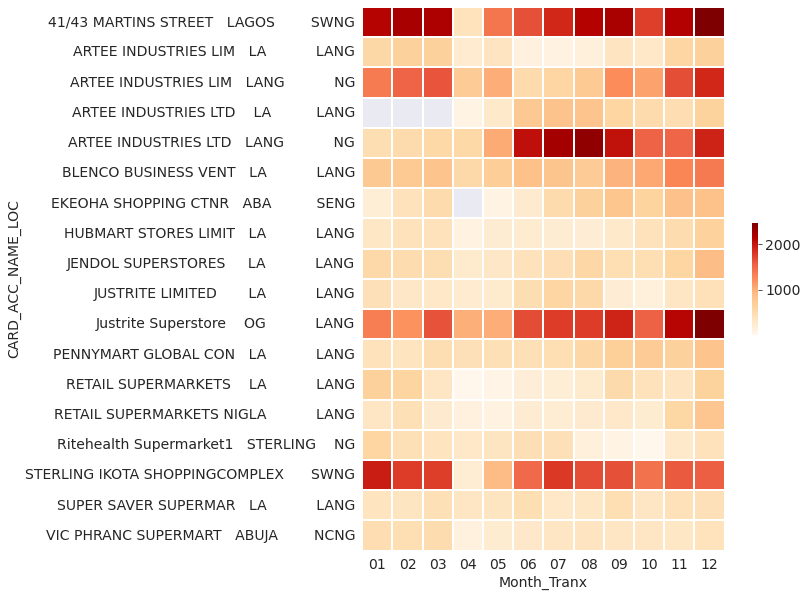

In [0]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    by_merchant, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)

In [0]:
by_merchants = (year2021
            .groupby('CARD_ACC_NAME_LOC')
            .filter(lambda x : len(x) > 3000)
            .groupby(['CARD_ACC_NAME_LOC', 'Month_Tranx'])
            .size()
            .unstack()
           )
by_merchants

Out[82]:

Month_Tranx,01,02,03,04,05,06,07,08,09
CARD_ACC_NAME_LOC,,,,,,,,,
41/43 MARTINS STREET LAGOS SWNG,1902.0,2023.0,1295.0,NaN,NaN,NaN,NaN,NaN,NaN
ARTEE INDUSTRIES LIM LANG NG,1558.0,1494.0,1054.0,509.0,367.0,338.0,361.0,380.0,96.0
ARTEE INDUSTRIES LIMIT LANG NG,NaN,17.0,1466.0,1870.0,1605.0,1389.0,1044.0,1124.0,301.0
ARTEE INDUSTRIES LIMITELA LANG,NaN,6.0,420.0,708.0,745.0,695.0,555.0,610.0,182.0
ARTEE INDUSTRIES LTD LA LANG,565.0,526.0,568.0,679.0,923.0,889.0,748.0,824.0,315.0
ARTEE INDUSTRIES LTD LANG NG,1743.0,1505.0,1546.0,1390.0,1598.0,1487.0,1368.0,1259.0,435.0
BLENCO BUSINESS VENT LA LANG,1303.0,968.0,1261.0,1274.0,1507.0,1407.0,1418.0,1401.0,461.0
EKEOHA SHOPPING CTNR ABA SENG,882.0,1005.0,1072.0,1123.0,995.0,1026.0,1146.0,1063.0,477.0
GLOBUS SUPERMARKET L LA LANG,427.0,510.0,663.0,588.0,661.0,577.0,506.0,553.0,218.0


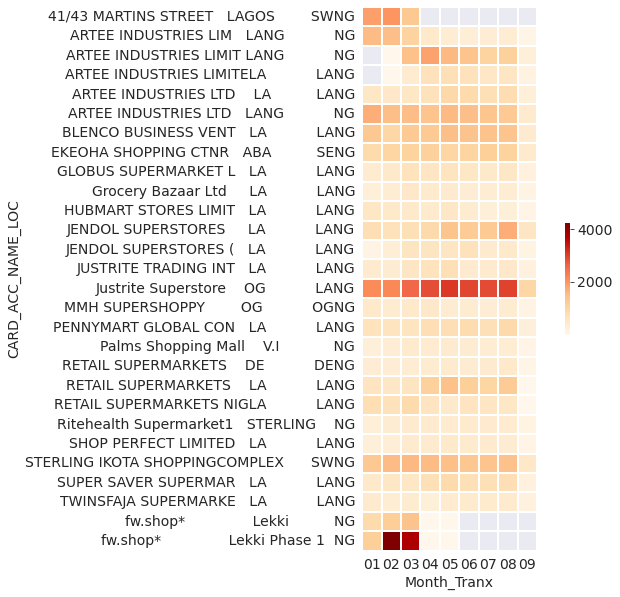

In [0]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    by_merchants, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)

In [0]:
# Excluding top sate  lagos and those without any state 
withoutlag = new_df.loc[(new_df['Fullmerchant_loc'] != 'LAGOS') & (new_df['Fullmerchant_loc'] != 'NIGERIA')]

In [0]:
by_state = (withoutlag
            .groupby('Fullmerchant_loc')
            .filter(lambda x : len(x) > 3000)
            .groupby(['Fullmerchant_loc', 'Month_Tranx'])
            .size()
            .unstack()
           )
by_state

Out[85]:

Month_Tranx,01,02,03,04,05,06,07,08,09,10,11,12
Fullmerchant_loc,,,,,,,,,,,,
ABIA,286,320,360,214,302,320,322,276,220,148,162,237
AKWA IBOM,717,596,746,847,797,821,858,842,531,366,421,544
ANAMBRA,365,296,353,374,335,385,413,297,228,199,189,253
BAYELSA,312,299,384,370,355,349,370,371,208,89,120,200
CROSS RIVER,280,306,284,263,341,358,346,299,200,128,131,198
DELTA,2211,2070,2036,1655,1892,1987,2185,2283,1265,757,1076,1326
EDO,846,843,887,872,931,1003,967,930,678,386,449,570
ENUGU,815,767,743,723,690,883,891,670,510,389,490,642
FCT,4102,4003,4503,3916,4164,5048,5080,4033,3145,2565,2670,2882


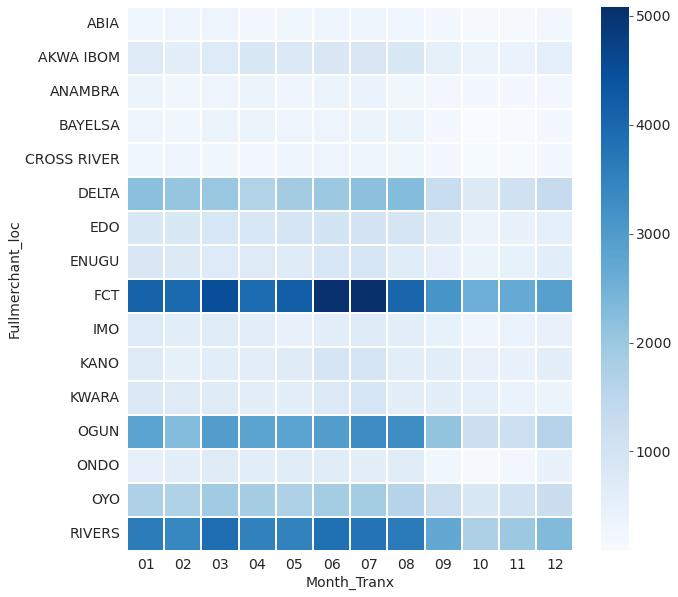

In [0]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    by_state, 
#     square=True, # make cells square
#     cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='Blues',
#   annot=True,# use orange/red colour map
    linewidth=1 # space between cells
)

In [0]:
by_state = (new_df
            .groupby('Fullmerchant_loc')
            .filter(lambda x : len(x) > 5000)
            .groupby(['Fullmerchant_loc', 'Month_Tranx'])
            .size()
            .unstack()
           )
by_state

Out[87]:

Month_Tranx,01,02,03,04,05,06,07,08,09,10,11,12
Fullmerchant_loc,,,,,,,,,,,,
AKWA IBOM,717,596,746,847,797,821,858,842,531,366,421,544
DELTA,2211,2070,2036,1655,1892,1987,2185,2283,1265,757,1076,1326
EDO,846,843,887,872,931,1003,967,930,678,386,449,570
ENUGU,815,767,743,723,690,883,891,670,510,389,490,642
FCT,4102,4003,4503,3916,4164,5048,5080,4033,3145,2565,2670,2882
IMO,747,647,658,594,445,588,722,605,488,334,402,460
KANO,714,536,648,634,700,957,930,646,653,470,450,590
KWARA,791,720,690,584,579,782,902,600,603,572,407,376
LAGOS,63946,62566,75373,64846,70832,76961,75440,76843,48264,32841,37426,45192


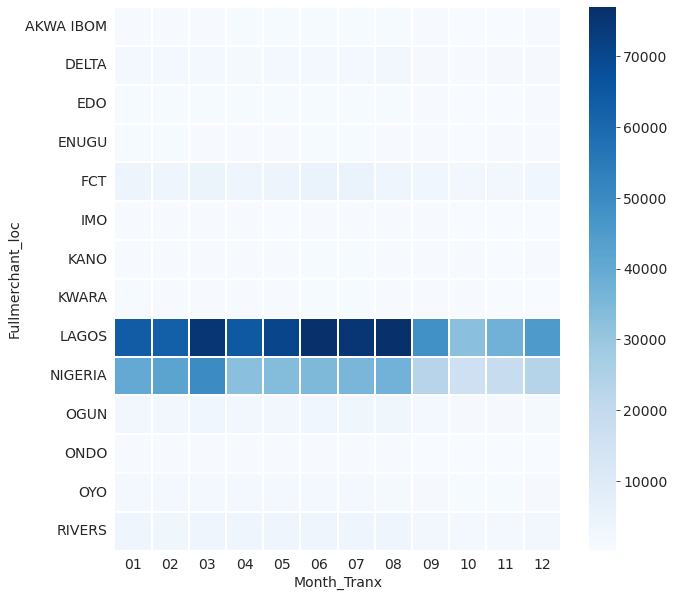

In [0]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    by_state, 
#     square=True, # make cells square
#     cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='Blues',
#   annot=True,# use orange/red colour map
    linewidth=1 # space between cells
)

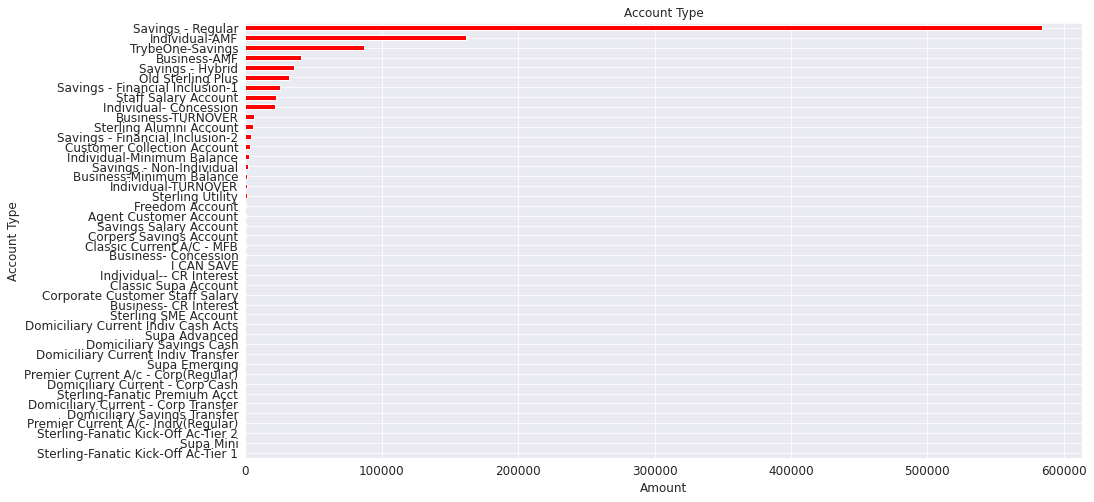

In [0]:
color = sns.color_palette()
group_state = year2020.groupby('Product_Desc')['CountT'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_state.plot(kind='barh', fontsize=12, color='red')
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Account Type', fontsize=12)
plt.title('Account Type', fontsize=12)
plt.show()

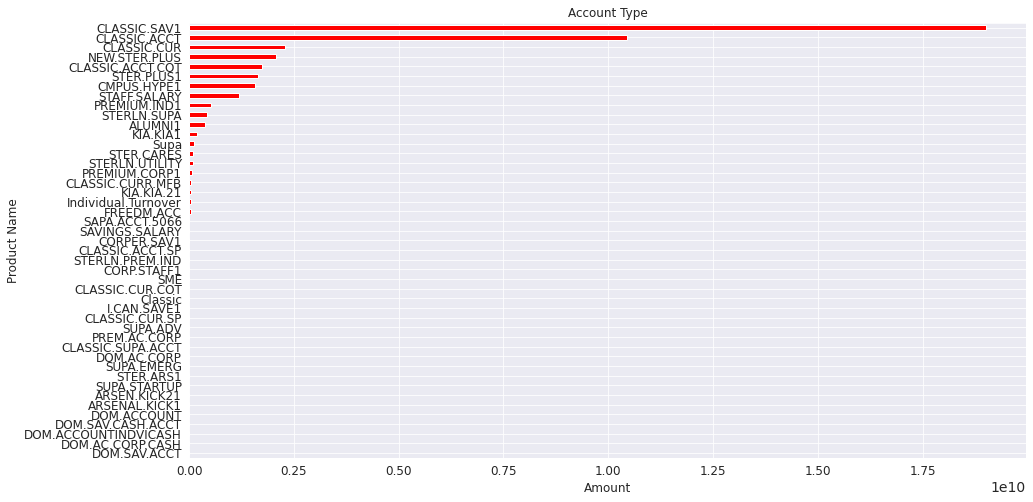

In [0]:
color = sns.color_palette()
group_state = year2020.groupby('ProductName')['Amount'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_state.plot(kind='barh', fontsize=12, color='red')
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Account Type', fontsize=12)
plt.show()

In [0]:
# Excluding top sate  lagos and those without any state 
withoutlag = new_df.loc[(new_df['Fullmerchant_loc'] != 'LAGOS') & (new_df['Fullmerchant_loc'] != 'NIGERIA')]

In [0]:
by_state = (withoutlag
            .groupby('Fullmerchant_loc')
            .filter(lambda x : len(x) > 5000)
            .groupby(['Fullmerchant_loc', 'Month_Tranx'])
            .size()
            .unstack()
           )
by_state

Out[92]:

Month_Tranx,01,02,03,04,05,06,07,08,09,10,11,12
Fullmerchant_loc,,,,,,,,,,,,
AKWA IBOM,717,596,746,847,797,821,858,842,531,366,421,544
DELTA,2211,2070,2036,1655,1892,1987,2185,2283,1265,757,1076,1326
EDO,846,843,887,872,931,1003,967,930,678,386,449,570
ENUGU,815,767,743,723,690,883,891,670,510,389,490,642
FCT,4102,4003,4503,3916,4164,5048,5080,4033,3145,2565,2670,2882
IMO,747,647,658,594,445,588,722,605,488,334,402,460
KANO,714,536,648,634,700,957,930,646,653,470,450,590
KWARA,791,720,690,584,579,782,902,600,603,572,407,376
OGUN,2825,2284,2967,2810,2822,2974,3292,3280,2114,1192,1147,1599


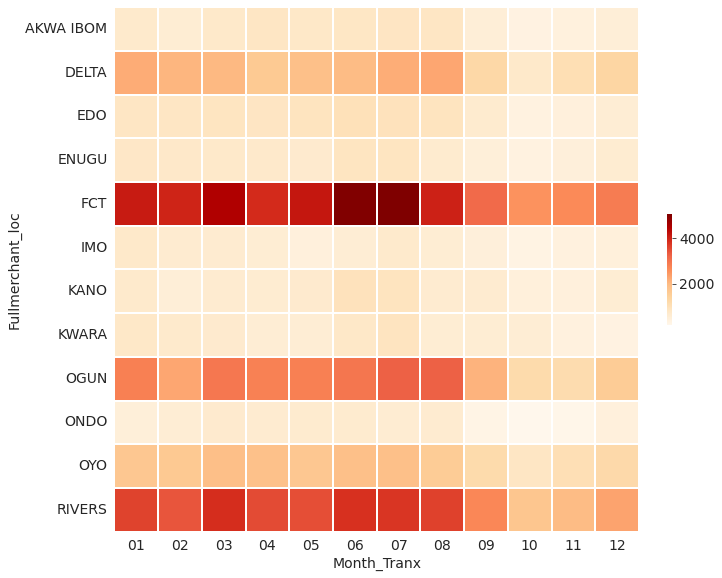

In [0]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    by_state, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)

In [0]:
n = 30
new_df.groupby('CARD_ACC_NAME_LOC', as_index=False).agg({"Amount": "sum", "CountT":"sum"})

Out[94]:

,CARD_ACC_NAME_LOC,Amount,CountT
0,JOB SMARTEleme NG,221500.0,18
1,BISHOP POSKaru NG,41100.0,11
2,EJIOFOR SHOPMakurdi NG,3000.0,1
3,ADEWUNMI SHOPIbadan North NG,10700.0,3
4,BET KING SHOPEti Osa NG,27300.0,5
...,...,...,...
24647,uncle sam shopping c LANG NG,25000.0,4
24648,walmart pharmacy and OG OGNG,1590.0,1
24649,welldone supermarket RI NG,91820.0,10
24650,welldone supermarket RI LANG,470450.0,70


In [0]:
SE= new_df[new_df['Fullmerchant_region'] == 'South East']
n = 30
SE.groupby(['CARD_ACC_NAME_LOC'])['CountT'].sum().nlargest(n)

Out[95]: CARD_ACC_NAME_LOC
RETAIL SUPERMARKETS GO IMNG 1869
DESTINY SUPERMARKET IM IMNG 1232
Roban Stores Limited EB ENNG 1035
CHERRIES HYPERMARKET AB ABNG 1000
ARTEE INDUSTRIES LIM EN ENNG 998
BISHOP BITE ATM_18 OSHA ANNG 893
PEP STORES NIGERIA P LA ABNG 882
BISHOP BITE ATM17 OSHA ANNG 875
RETAIL SUPERMARKETS EN ENNG 796
GAME DISCOUNT WORLD EN ENNG 707
ROBAN STORES LTD EB EBNG 634
ROBAN STORES LIMITED EN ENNG 621
Roban Stores Limited AN ENNG 608
LEEDEL SUPER STORES IM IMNG 548
ROBAN STORES LTD LA ENNG 540
PRICE-LESS STORES & IM IMNG 516
ROBAN STORES LIMITED AN ANNG 475
EASTERN SHOP DEPARTM EN ENNG 410
BISHOP BITE ATM6 OSHA ANNG 405
IN GOD SUPERMARKET IM IMNG 358
RETAIL SUPERMARKETS AN ANNG 344
ARTEE INDUSTRIES LTD EN ENNG 334
MARIS SUPERMARKET LT IM IMNG 334
AMBY SUPERMARKET IM IMNG 316
GAME DISCOUNT WORLD LA ABNG 315
ARTEE INDUSTRIES LTD EN ENNG 284
ARTEE INDUSTRIES LIM EN ENNG 279
BISHOP BITE ATM_9 OSHA ANNG 275
RETAIL SUPERMARKETS NIG. LTD(OWERRI IMNG 275
CONSUMART GLOBAL SER IM IMNG 272
Name: CountT, dtype: int64